In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [7]:
df.Glucose.max()


199

In [8]:
df.Glucose.sort_values(ascending=False)


661    199
561    198
228    197
8      197
579    197
      ... 
342      0
349      0
502      0
182      0
75       0
Name: Glucose, Length: 768, dtype: int64

In [9]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

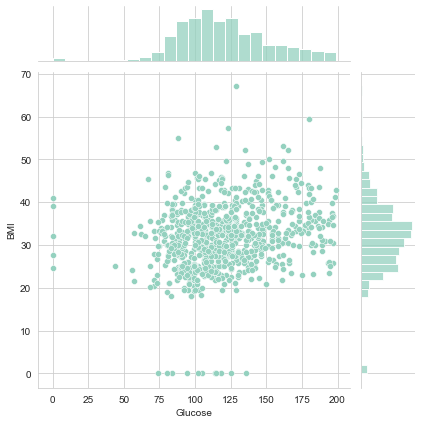

In [11]:
sns.jointplot(x='Glucose',y='BMI',data=df)


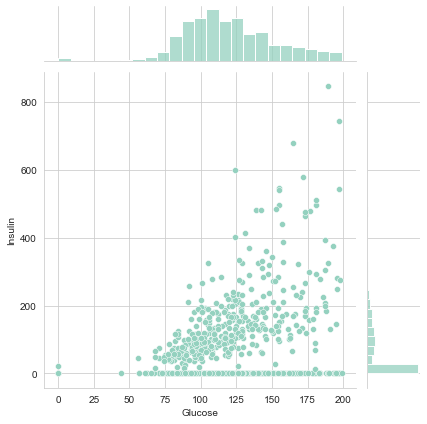

In [12]:
sns.jointplot(x='Glucose',y='Insulin',data=df)


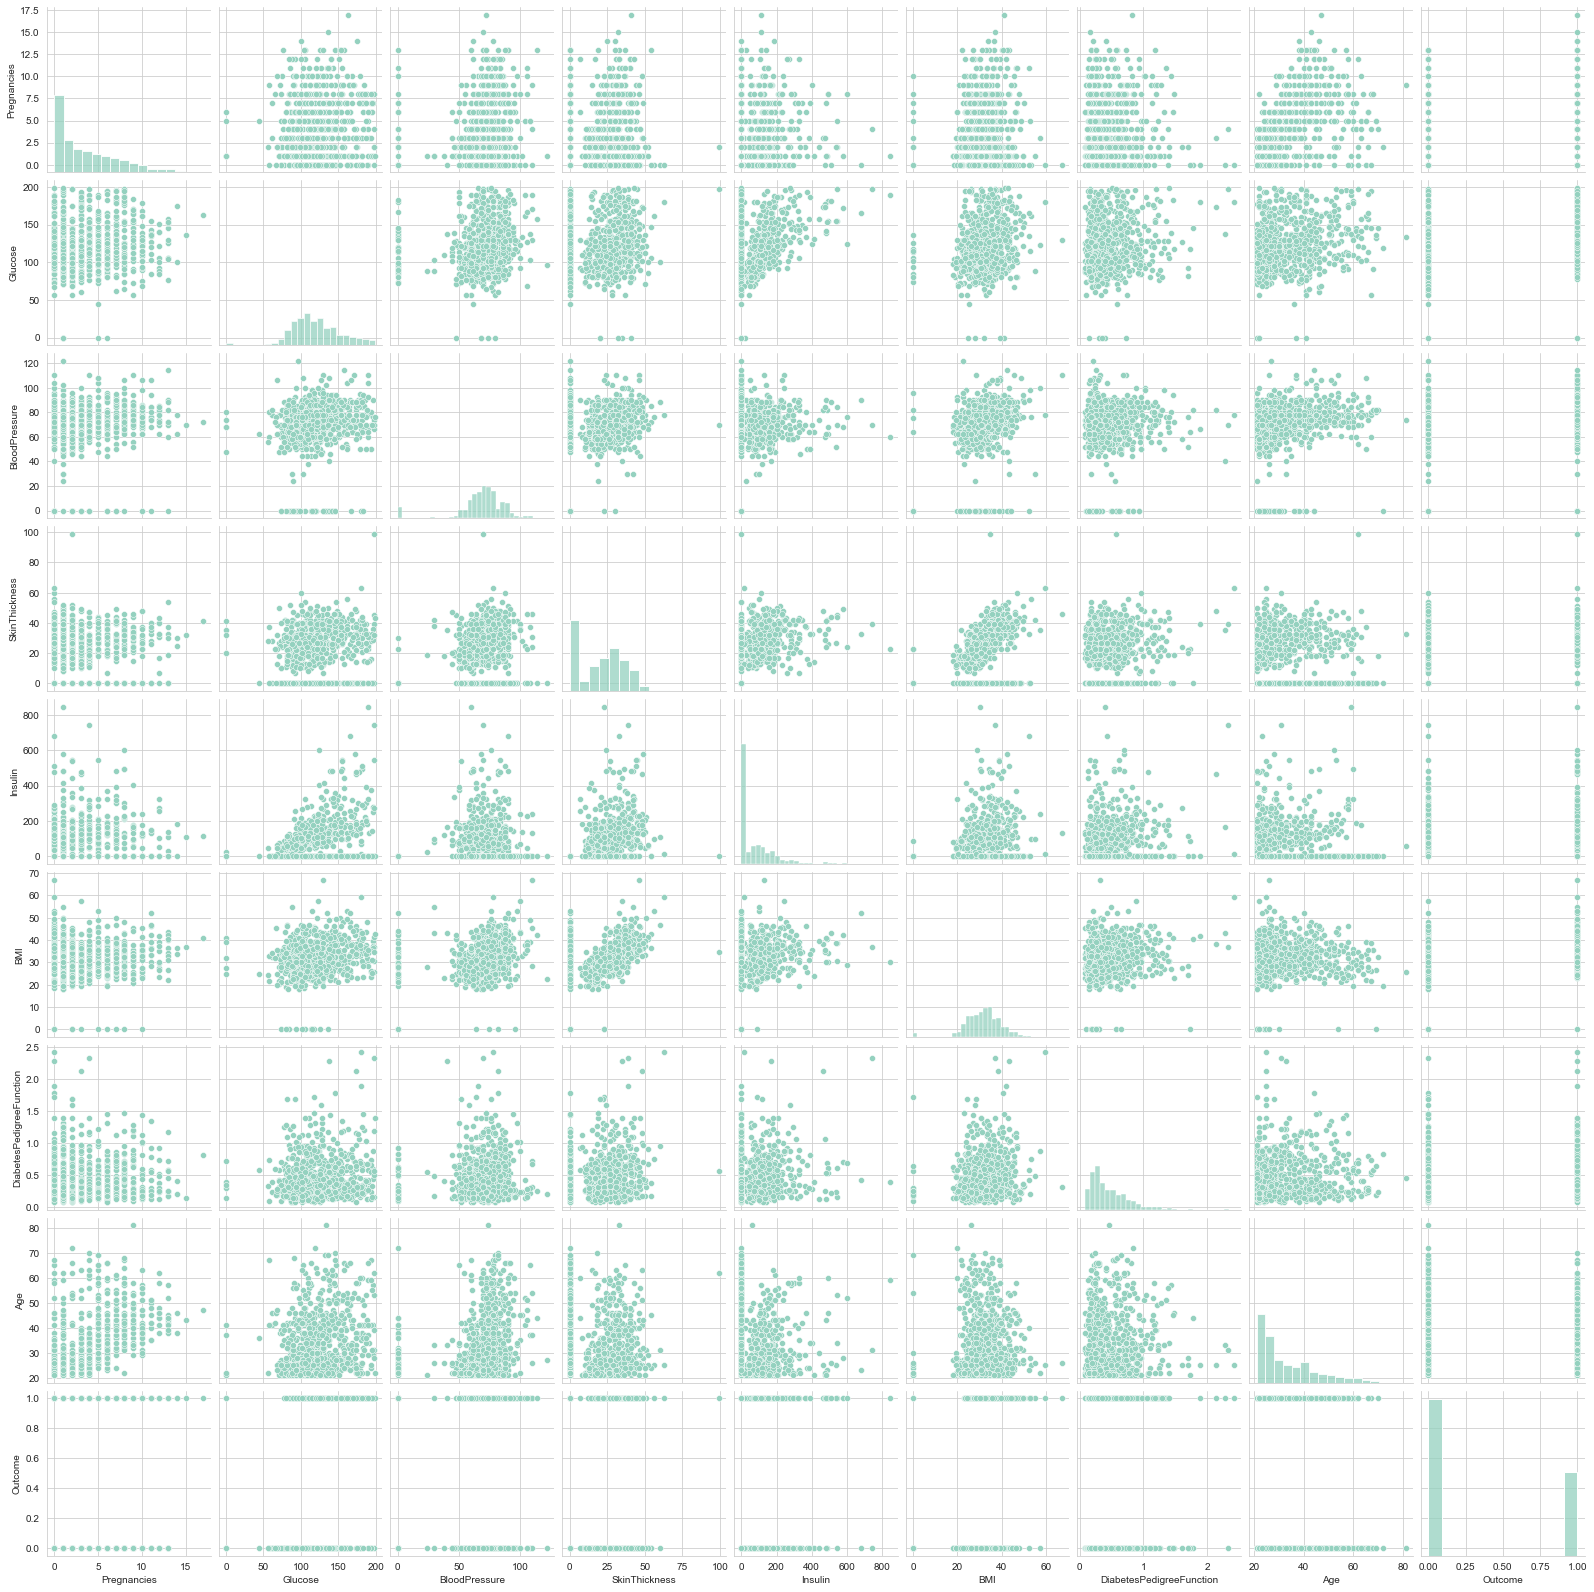

In [13]:
sns.pairplot(df)


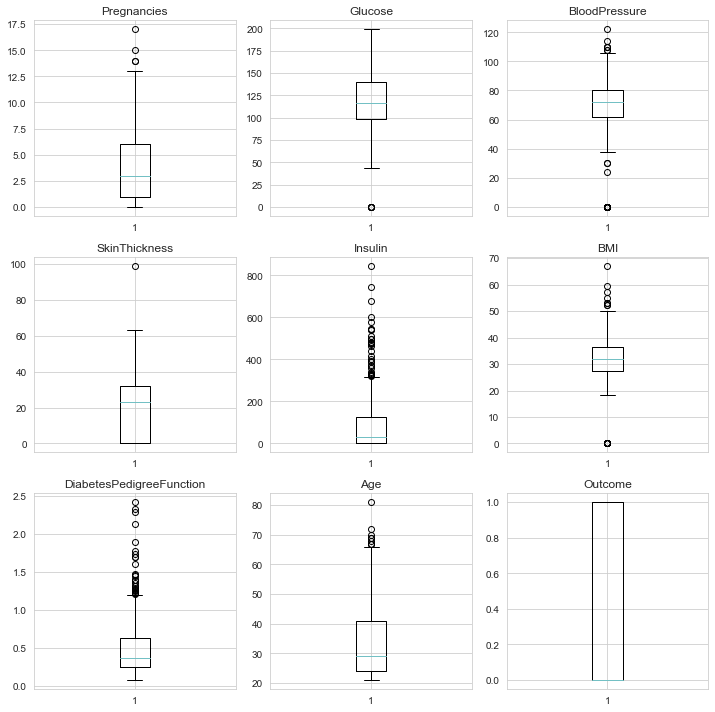

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
row = 0
col = 0
for column in df.columns:
    axs[row, col].boxplot(df[column])
    axs[row, col].set_title(column)
    col += 1
    if col == 3:
        row += 1
        col = 0

plt.tight_layout()
plt.show()


In [15]:
without_target=df.iloc[:, :-1]
y=df['Outcome']

In [16]:
for col in without_target.columns:
    if col not in ['Insulin', 'Pregnancies']:
        col_mean = df[col].mean()
        without_target.loc[df[col] == 0, col] = col_mean
        
without_target

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,0,33.6,0.627,50.0
1,1,85.0,66.0,29.000000,0,26.6,0.351,31.0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32.0
3,1,89.0,66.0,23.000000,94,28.1,0.167,21.0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180,32.9,0.171,63.0
764,2,122.0,70.0,27.000000,0,36.8,0.340,27.0
765,5,121.0,72.0,23.000000,112,26.2,0.245,30.0
766,1,126.0,60.0,20.536458,0,30.1,0.349,47.0


In [17]:
def remove_outliers(df, columns, threshold=3):
    """
    Remove outliers from a Pandas DataFrame
    
    Parameters:
    df (Pandas DataFrame): DataFrame to remove outliers from
    columns (list of str): list of column names to remove outliers from
    threshold (float): the number of standard deviations from the mean to consider an outlier
    
    Returns:
    clean_df (Pandas DataFrame): DataFrame with outliers removed
    """
    clean_df = df.copy()
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        cutoff = std * threshold
        lower, upper = mean - cutoff, mean + cutoff
        clean_df = clean_df[(clean_df[column] >= lower) & (clean_df[column] <= upper)]
    return clean_df


In [18]:
cleaned=remove_outliers(without_target,without_target.columns,3)

In [19]:
cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,0,33.6,0.627,50.0
1,1,85.0,66.0,29.000000,0,26.6,0.351,31.0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32.0
3,1,89.0,66.0,23.000000,94,28.1,0.167,21.0
5,5,116.0,74.0,20.536458,0,25.6,0.201,30.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180,32.9,0.171,63.0
764,2,122.0,70.0,27.000000,0,36.8,0.340,27.0
765,5,121.0,72.0,23.000000,112,26.2,0.245,30.0
766,1,126.0,60.0,20.536458,0,30.1,0.349,47.0


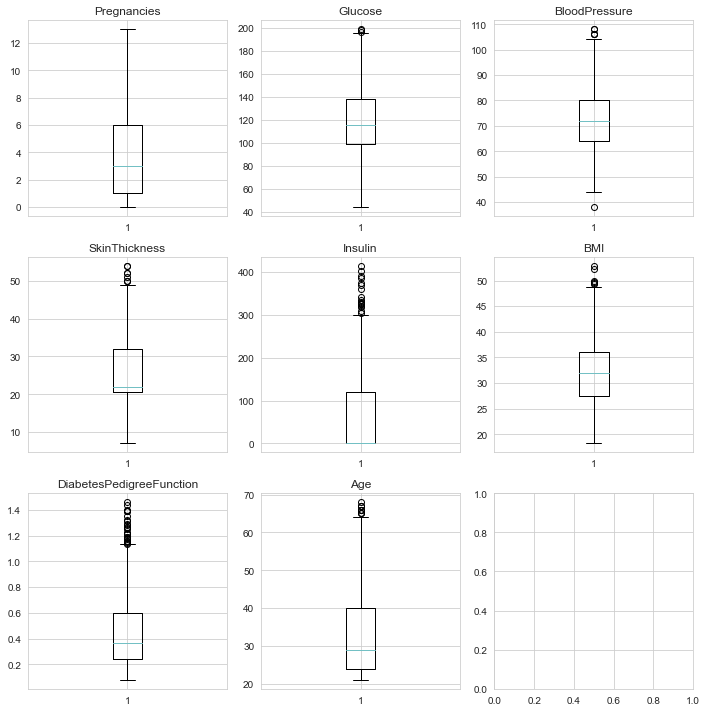

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
row = 0
col = 0
for column in cleaned.columns:
    axs[row, col].boxplot(cleaned[column])
    axs[row, col].set_title(column)
    col += 1
    if col == 3:
        row += 1
        col = 0

plt.tight_layout()
plt.show()


In [21]:
cleaned['Outcome']=y
cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31.0,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21.0,0
5,5,116.0,74.0,20.536458,0,25.6,0.201,30.0,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27.000000,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.000000,112,26.2,0.245,30.0,0
766,1,126.0,60.0,20.536458,0,30.1,0.349,47.0,1


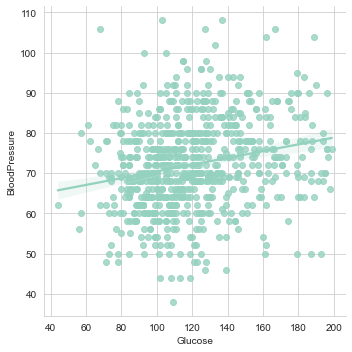

In [22]:
sns.lmplot(x='Glucose',y='BloodPressure',data=cleaned)


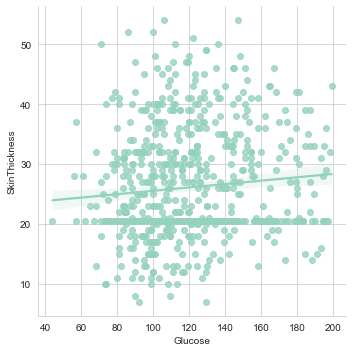

In [23]:
sns.lmplot(x='Glucose',y='SkinThickness',data=cleaned)


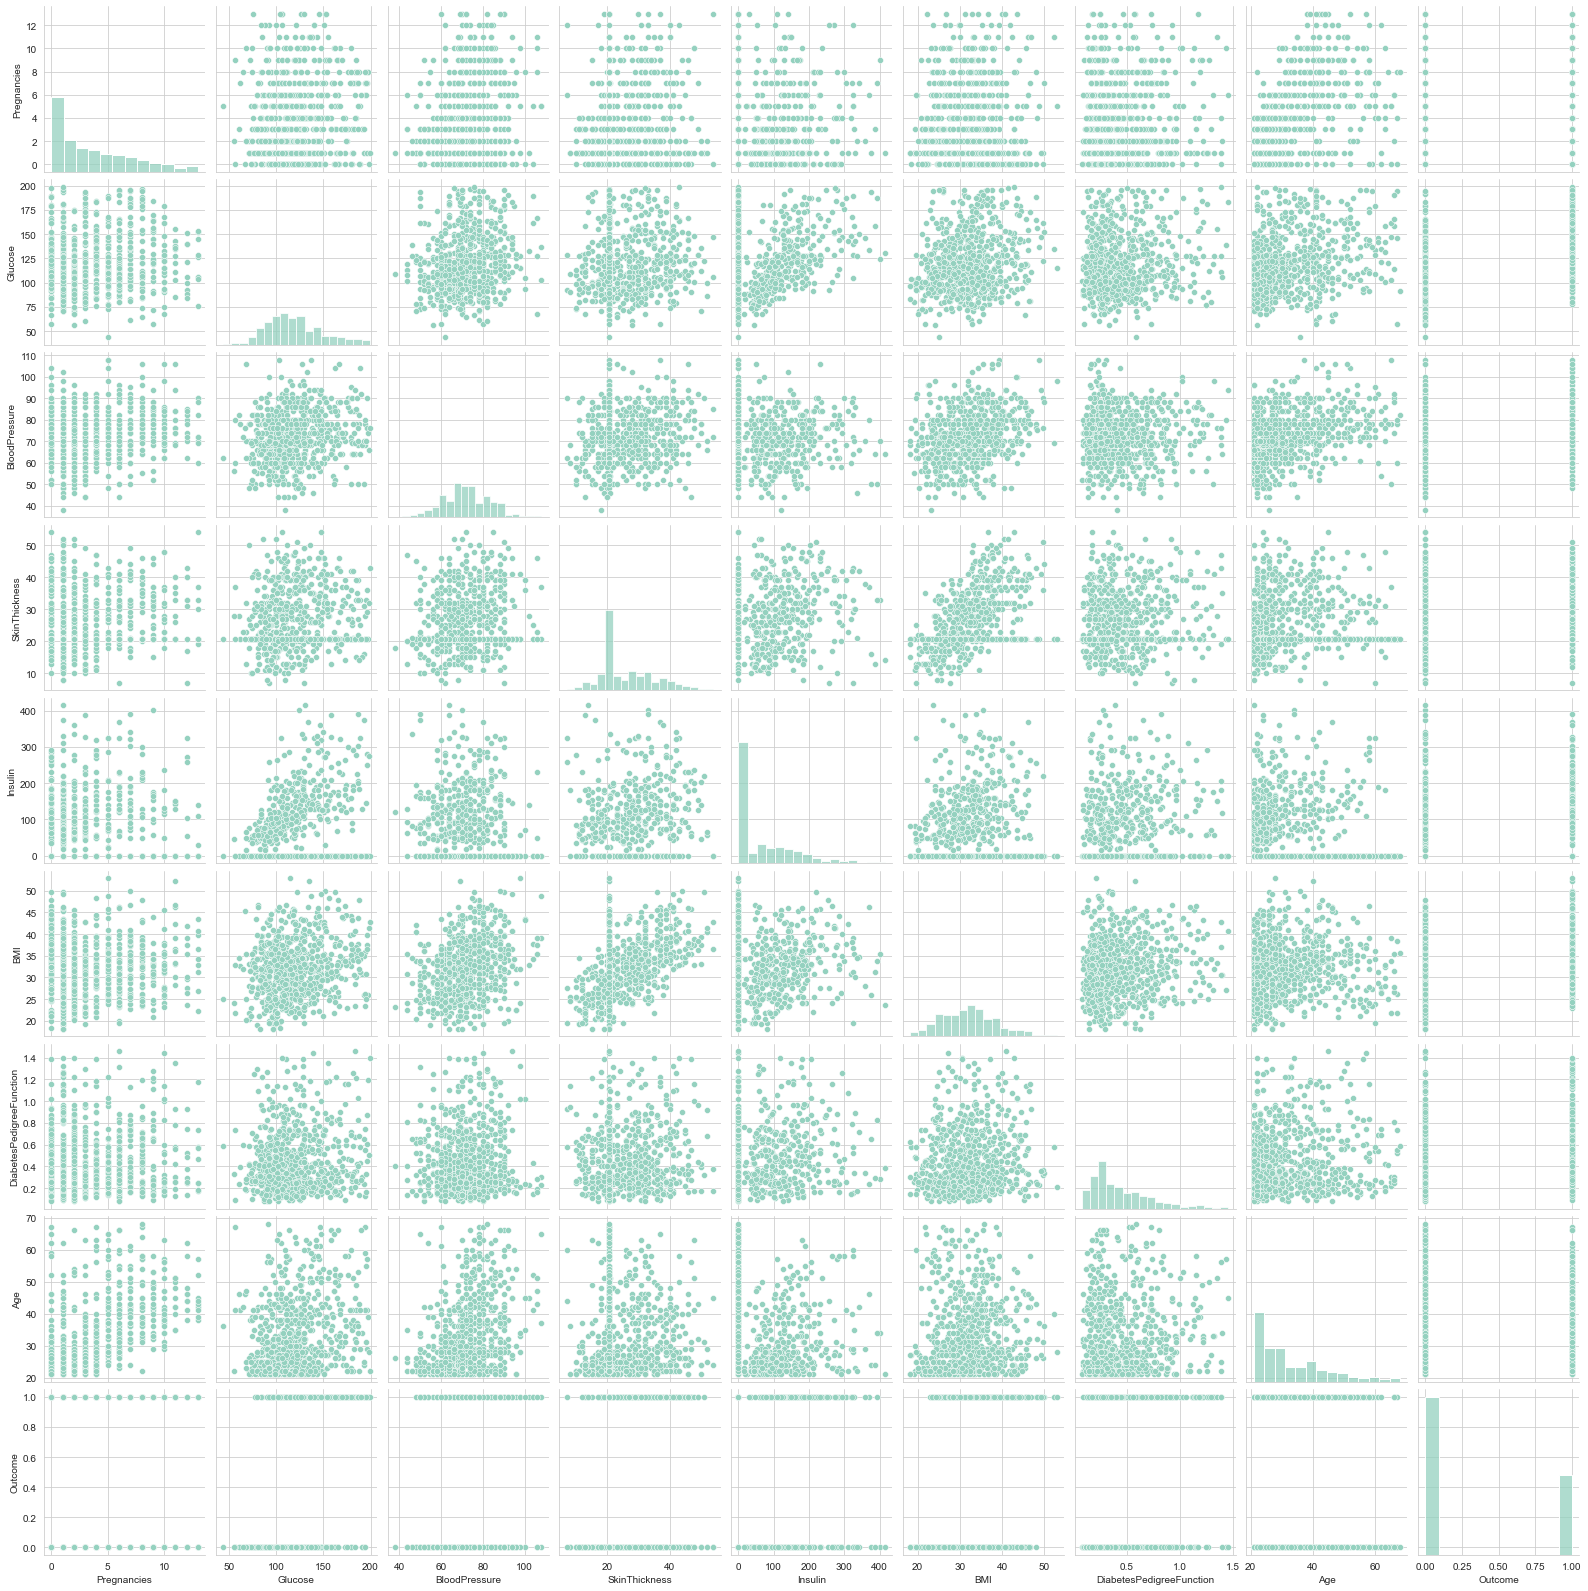

In [24]:
sns.pairplot(cleaned)

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object to normalize the data
scaler = MinMaxScaler()

# Loop through each column in the DataFrame and normalize the data
for col in cleaned.columns:
    cleaned[[col]] = scaler.fit_transform(cleaned[[col]])

# Display the normalized data
cleaned.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.485714,0.595745,0.000000,0.443804,0.396963,0.617021,1.0
1,0.076923,0.264516,0.400000,0.468085,0.000000,0.242075,0.197397,0.212766,0.0
2,0.615385,0.896774,0.371429,0.288010,0.000000,0.146974,0.429501,0.234043,1.0
3,0.076923,0.290323,0.400000,0.340426,0.226506,0.285303,0.064353,0.000000,0.0
5,0.384615,0.464516,0.514286,0.288010,0.000000,0.213256,0.088937,0.191489,0.0
6,0.230769,0.219355,0.171429,0.531915,0.212048,0.368876,0.122921,0.106383,1.0
7,0.769231,0.458065,0.444364,0.288010,0.000000,0.492795,0.040492,0.170213,0.0
9,0.615385,0.522581,0.828571,0.288010,0.000000,0.397481,0.111352,0.702128,1.0
10,0.307692,0.425806,0.771429,0.288010,0.000000,0.559078,0.081706,0.191489,0.0
11,0.769231,0.800000,0.514286,0.288010,0.000000,0.570605,0.331887,0.276596,1.0


In [26]:
without_target=cleaned.iloc[:, :-1]
outcome=cleaned['Outcome']

In [27]:
from sklearn.decomposition import PCA


In [28]:
from sklearn.decomposition import PCA

original_columns = without_target.columns

# Create a PCA object with 5 components
pca = PCA(n_components=5)

# Fit the PCA model to the standardized data
pca.fit(without_target)

# Get the feature scores from the PCA model
feature_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=original_columns)

# Sort the features by the absolute value of their scores
sorted_features = feature_scores.abs().sort_values(by=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], ascending=False)

top_5_features = sorted_features.index[:5]

# Get the original data with the top 5 features
transformed = without_target[top_5_features]

# Print the original data with the top 5 features


In [29]:
transformed['Outcome']=y
transformed

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5148\2154807912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed['Outcome']=y


,Pregnancies,Age,BloodPressure,Glucose,BMI,Outcome
0,0.461538,0.617021,0.485714,0.670968,0.443804,1
1,0.076923,0.212766,0.400000,0.264516,0.242075,0
2,0.615385,0.234043,0.371429,0.896774,0.146974,1
3,0.076923,0.000000,0.400000,0.290323,0.285303,0
5,0.384615,0.191489,0.514286,0.464516,0.213256,0
...,...,...,...,...,...,...
763,0.769231,0.893617,0.542857,0.367742,0.423631,0
764,0.153846,0.127660,0.457143,0.503226,0.536023,0
765,0.384615,0.191489,0.485714,0.496774,0.230548,0
766,0.076923,0.553191,0.314286,0.529032,0.342939,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed.drop('Outcome', axis=1), transformed['Outcome'], test_size=0.2, random_state=42)

# Define the SVM model with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Predict the target column of the test set
y_pred = svm.predict(X_test)

# Evaluate the performance of the SVM model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       103
           1       0.62      0.51      0.56        41

    accuracy                           0.77       144
   macro avg       0.72      0.69      0.70       144
weighted avg       0.76      0.77      0.76       144



In [31]:
def accuracy(y_predicted, y_test):
    """
    Calculate the accuracy between the predicted and true values.
    
    Parameters:
    y_predicted (numpy array): predicted values
    y_test (numpy array): true values
    
    Returns:
    accuracy (float): accuracy between predicted and true values
    """
    assert y_predicted.shape == y_test.shape, "Predicted and true values have different shapes"
    correct = np.sum(y_predicted == y_test)
    total = y_test.shape[0]
    accuracy = correct / total
    return accuracy


In [32]:
accuracy(y_pred,y_test)

0.7708333333333334

In [33]:
from sklearn.linear_model import LogisticRegressionCV

In [34]:
model=LogisticRegressionCV()

In [35]:
model.fit(X_train,y_train)

LogisticRegressionCV()

In [36]:
y_pred=model.predict(X_test)

In [37]:
accuracy(y_pred,y_test)

0.7847222222222222